# **1. Configuração inicial do ambiente Python**

Nesse passo, configuro meu ambiente de programação utilizando algumas ferramentas básicas de Python :


a) `pandas` : Biblioteca para análise de dados. Utilizada para importar nosso arquivo .csv, além de transforma-lo em uma tabela estruturada dentro do ambiente Python.

b) `numpy` : biblioteca de caráter matemático que trabalha em conjunto com o `pandas` na computação numérica em Python.

c) `matplotlib` : biblioteca utilizada na elaboração de gráficos, permitindo melhor visualização das nossas análises.

d) `seaborn` : biblioteca complementar ao `matplotlib`, permitindo plotar gráficos de caráter mais complexos, como mapas de calor.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Criação de pasta para salvarmos os gráficos, evitando eventuais erros.
if not os.path.exists('images'):
    os.makedirs('images')


# **2. Tratamento de Dados**

**2.1.** Ao manipular os dados da tabela pela primeira vez, fiz um diagnóstico utilizando a função `df.info()`, verificando os tipos de dados de cada coluna. Notei que colunas cruciais para a análise quantitativa, como `Runtime`, `Gross` e `Released_Year`, estavam incorretamente classificadas como texto, o que impediria qualquer eventual cálculo.

**2.2.** Além disso, por meio de uma inspeção visual utilizando `df.head()` revelou-se também a presença de caracteres não-numéricos, como "min" e vírgulas, que necessitavam ser removidos.

**2.3.** Por fim, durante a fase de diagnóstico utilizando `df.info()` e `df.isnull().sum()`, notei a ausência de valores nas seguintes colunas :

- `Certificate` : ausência de classificação indicativa de alguns filmes.
- `Meta_score` : ausência da nota do Metacritic de alguns filmes.
- `Gross`: ausência do valor de faturamento de bilheteira para alguns filmes.

**2.4.** Além disso, na coluna `Released_Year`, pelo fato de eu ter identificado que apenas um único filme apresentava um valor inválido, no caso o filme Apollo 13, resolvi de forma manual buscar de uma fonte externa (**Google.com**), seu ano correto de lançamento. O fiz dessa forma por se tratar de um único dado. Em casos mais extremos em que minha base de dados apresentasse diversos valores incorretos, eu introduziria uma fonte de dados externa mais robusta para corrigir todos eles.

**2.5.** Ao invés de simplesmente remover as linhas com dados faltantes, o que resultaria na perda de dados valiosos, optei por utilizar uma **imputação**. Para as colunas numéricas `Meta_score` e `Gross`, utilizei a **mediana** para preencher os valores que estavam faltando, uma vez que tal medida central não é afetada por outliers (valores extremos), comuns em bases de dados financeiros e avaliativos. Desse modo, evita-se a distorção da análise. Para a coluna `Certificate`, optei por substistuir os valores pela string 'Not Rated'.

In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')

# Linha de código paliativo, evitando a criação de um índice antigo.
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Corrigindo 'Runtime' e 'Gross'.
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Corrigindo 'Released_Year'.
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995

# Imputação.
median_year = df['Released_Year'].median()
df['Released_Year'] = df['Released_Year'].fillna(median_year)

df['Certificate'] = df['Certificate'].fillna('Not Rated')

median_meta_score = df['Meta_score'].median()
df['Meta_score'] = df['Meta_score'].fillna(median_meta_score)

median_gross = df['Gross'].median()
df['Gross'] = df['Gross'].fillna(median_gross)

# Garantindo que o ano seja um número inteiro.
df['Released_Year'] = df['Released_Year'].astype(int)

df



,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23457439.5
995,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,23457439.5
996,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
997,Lifeboat,1944,Not Rated,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23457439.5


# **3. Análise Exploratória de Dados**

## **Classificando nossas variáveis**

O primeiro passo que devemos tomar numa análise completa e robusta de dados, deve ser a de categorizar nossas variáveis. Temos 2 tipos principais, as **categóricas** (de maneira geral, são variáveis qualitativas e rotulares) e as **numéricas** (possuem um aspecto quantitativo, podendo ser contadas e manipuladas matematicamente). Além disso, temos os chamados **identificadores únicos**, que são variáveis cujo propósito é identificar cada dado de forma única.



In [3]:
# Determinando a quantidade de valores únicos em cada variável
df.nunique().sort_values()

,0
IMDB_Rating,16
Certificate,17
Meta_score,63
Released_Year,99
Runtime,140
Genre,202
Director,548
Star1,659
Gross,823
Star2,840


In [4]:
# Determinando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB


Ao conhecer, ler e interpretar nossa base de dados, observando a natureza de cada coluna e, ao combinarmos o `.nunique().sort_values()` com o `.info()` como ferramentas de apoio, conseguimos reforçar nossa análise e identificar que :     

- Variáveis numéricas : `Released_Year`, `Runtime`, `IMDB_Rating`, `Meta_score`, `No_of_Votes` e `Gross`.

- Variáveis categóricas : `Certificate`, `Genre`, `Director`, `Star1`, `Star2`, `Star3` e `Star4`.

De maneira geral, quando vamos analisar dados e os valores únicos de nossas variáveis, classificamos uma variável como sendo categórica quando há um número de valores únicos baixos em comparação com total de linhas, o que de fato acontece por exemplo para `Certificate`. Por outro lado, classificamos uma variável como sendo numérica ou ainda um identificador, quando há um número alto de valores únicos, como verificamos em `Gross`, `No_of_Votes`, `Series_Title`.

Entretanto, essa análise não é perfeita, pelo contrário, é útil para um diagnóstico rápido, devendo ser sempre feita de forma complementar, como foi feito utilizando a ferramenta `.info()`, que nos diz os tipos de variáveis.



## **Análise Univariada**

O próximo passo lógico de uma EDA, é analisar de forma isolada cada uma das nossas variáveis.

Vamos iniciar analisando as **variáveis numéricas** :

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,1991.218218,122.871872,7.947948,78.131131,2.716214e+05,6.053338e+07
std,23.297166,28.101227,0.272290,11.373766,3.209126e+05,1.014694e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.547150e+04,5.011838e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,85.500000,3.731675e+05,6.157656e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


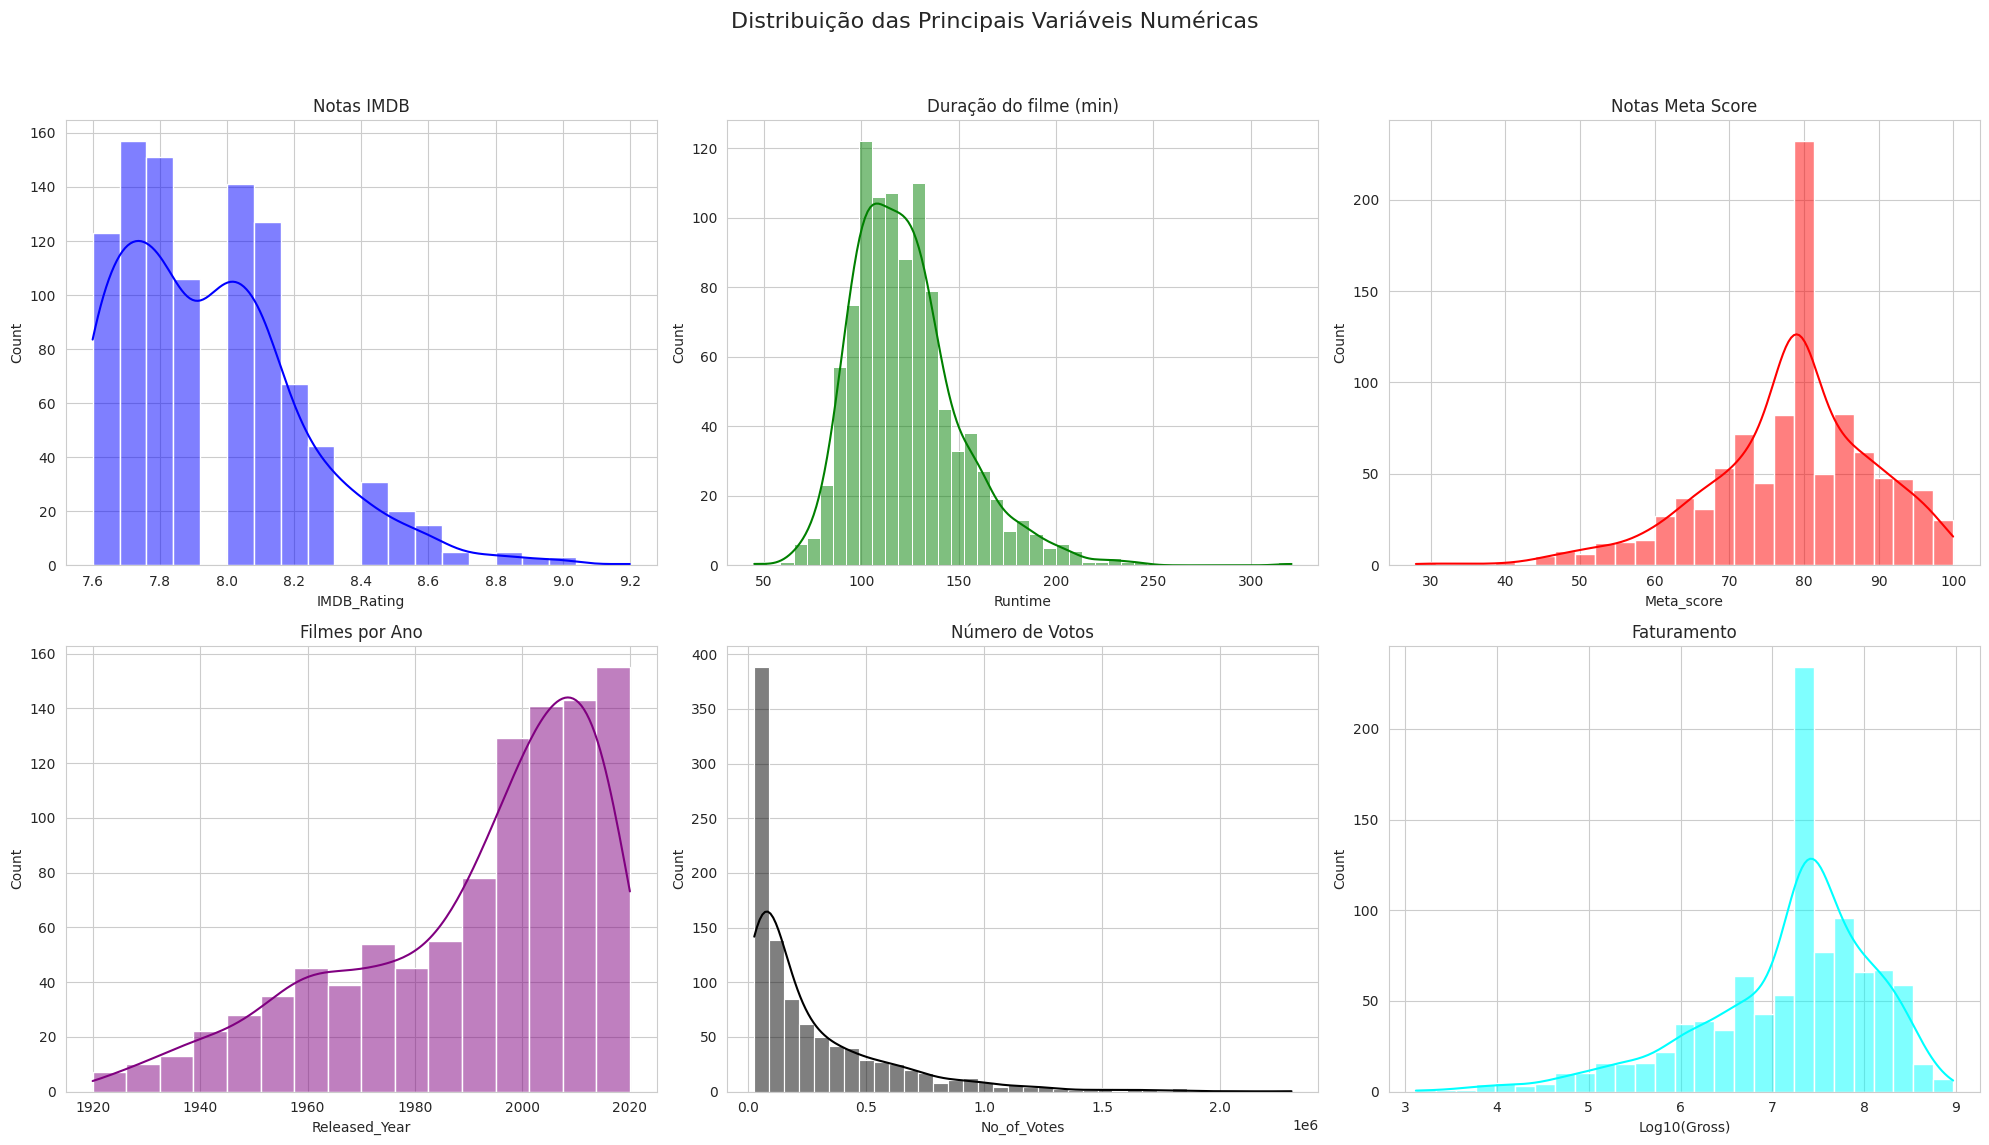

In [5]:
# 1. Resumo Estatístico utilizando .describe()
numeric_cols = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
display(df[numeric_cols].describe())


# 2. Visualização das distribuições por meio de Histogramas
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribuição das Principais Variáveis Numéricas', fontsize=16)

# IMDB_Rating
sns.histplot(df['IMDB_Rating'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Notas IMDB')

# Runtime
sns.histplot(df['Runtime'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Duração do filme (min)')

# Meta_score
sns.histplot(df['Meta_score'], kde=True, ax=axes[0, 2], color='red')
axes[0, 2].set_title('Notas Meta Score')

# Released_Year
sns.histplot(df['Released_Year'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Filmes por Ano')

# No_of_Votes
sns.histplot(df['No_of_Votes'], kde=True, ax=axes[1, 1], color='black')
axes[1, 1].set_title('Número de Votos')

# Gross (adaptação feita na escala de log para melhor visualização)
sns.histplot(np.log10(df['Gross']), kde=True, ax=axes[1, 2], color='cyan')
axes[1, 2].set_title('Faturamento')
axes[1, 2].set_xlabel('Log10(Gross)')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images/histogramas_numericas.png')
plt.show()

Principais características e insights de cada variável :     

- `IMDB_Rating` : Observamos uma distribuição semelhante a uma curva normal, mas com assimetria negativa (ou seja, na esquerda). Primeiramente, notamos que a média (mean) é de 7.94 aproximadamente, e que a mediana (50%) é de 7.9. Dito isso, verificamos graficamente que a maioria dos filmes de sucesso possuem notas entre 7.5 e 8.5, o que indica que de fato há uma concentração de filmes nessa faixa de nota, com poucos filmes considerados "muito ruins" ou "muito bons".

- `Gross` e `No_of_Votes` : Ambas as variáveis possuem uma distribuição altamente assimétrica à direita (vale reforçar que graficamente Gross não expressa essa tendência, isso porque foi feita uma transformação na escala log, todavia, através dos dados brutos é possível visualizarmos melhor essa assimetria). Notamos que média de faturamento é muito superior a mediana, e a explicação para isso reside provavelmente na presença de blockbusters, filmes que, apesar de em menor quantidade, faturam e recebem muito mais votos que a grande maioria dos filmes, o que eleva nossa média para cima.

- `Meta_score` : temos uma distribuição um pouco diferente do que as notas do `IMDB_Rating`, apesar de apresentarem perfis semelhantes de média e mediana. Notamos que as notas presentes no Metacritics tem picos em faixas variadas, sugerindo menor consenso entre os críticos do que em relação a concentração presente entre a faixa 7.5 e 8.5 do IMDB.

- `Released_Year` : Ao analisarmos em conjunto o gráfico com a tabela descritiva, notamos como a maioria dos filmes mais bem avaliados foram lançados nas últimas duas décadas (observação pode ser feita pela análise dos 50%, indicando que cerca de 500 filmes dos 1000 mais bem avaliados, foi lançada depois de 2004, bem como analisar o 75%, o que significa que 250 filmes dos bem mais avaliados foram lançados depois de 2012).

Analisando em seguida as **variáveis categóricas** :

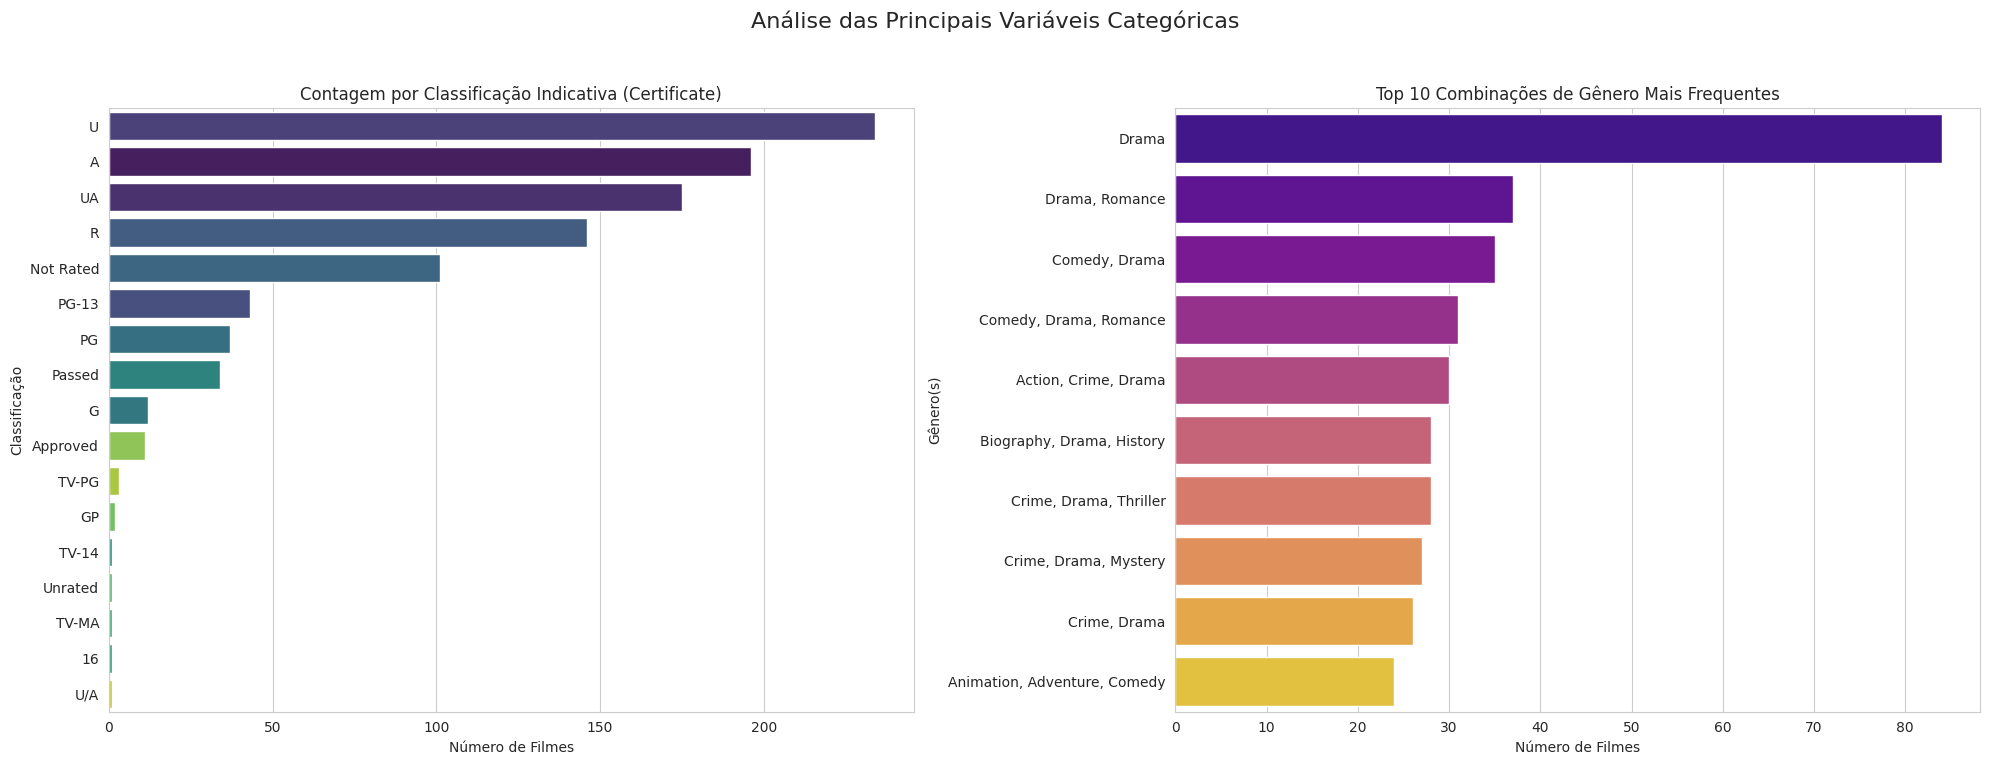

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Análise das Principais Variáveis Categóricas', fontsize=16)

# 1. Certificate (Classificação Indicativa)
sns.countplot(
    y=df['Certificate'],
    order=df['Certificate'].value_counts().index,
    ax=axes[0],
    palette='viridis',
    hue=df['Certificate'],
    legend=False
)
axes[0].set_title('Contagem por Classificação Indicativa (Certificate)')
axes[0].set_xlabel('Número de Filmes')
axes[0].set_ylabel('Classificação')


# 2. Genre (Combinações de Gênero)
top_10_genres = df['Genre'].value_counts().head(10)
sns.barplot(
    x=top_10_genres.values,
    y=top_10_genres.index,
    ax=axes[1],
    palette='plasma',
    hue=top_10_genres.index,
    legend=False
)
axes[1].set_title('Top 10 Combinações de Gênero Mais Frequentes')
axes[1].set_xlabel('Número de Filmes')
axes[1].set_ylabel('Gênero(s)')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images/graficos_categoricas.png')
plt.show()

Principais características e insights de cada variável :

- `Certificate` : Notamos como as classificações mais comuns são 'U', 'A' e 'UA', indicando que filmes de classificação livre (U) e para maiores de 18 (A), indicando como o cinema que faz sucesso é bastante versátil nas suas produções, agradando todas as faixa etárias.

- `Genre` : O gênero "Drama" por si só, aparece com um destaque esmagador para com relação a outros gêneros. Não só isso, é o gênero que mais se combina com outros, revelando como um filme de sucesso deve possuir esse componente.

## **Análise Bivariada**

Vamos agora fazer algumas análises mais aprofundadas escolhendo 3 cruzamentos de variáveis :    
- 1. `IMDB_Rating` x `Meta_score`
- 2. `Released_Year` x `Gross`
- 3. `Certificate` x `Genre`

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime
IMDB_Rating,1.000000,0.261010,0.479308,0.088139,0.242751
Meta_score,0.261010,1.000000,-0.028558,-0.051865,-0.026479
No_of_Votes,0.479308,-0.028558,1.000000,0.602705,0.172483
Gross,0.088139,-0.051865,0.602705,1.000000,0.138628
Runtime,0.242751,-0.026479,0.172483,0.138628,1.000000


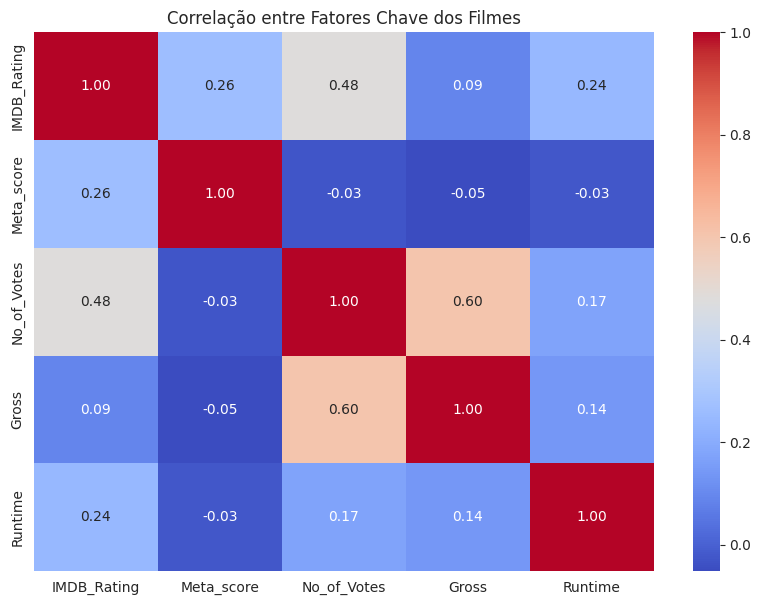

In [7]:
# Matriz de correlação para variáveis numéricas :

numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
corr_matrix = df[numeric_cols].corr()
display(corr_matrix)

plt.figure(figsize=(10, 7))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Fatores Chave dos Filmes')
plt.savefig('images/heatmap_correlacao_bivariada.png')
plt.show()

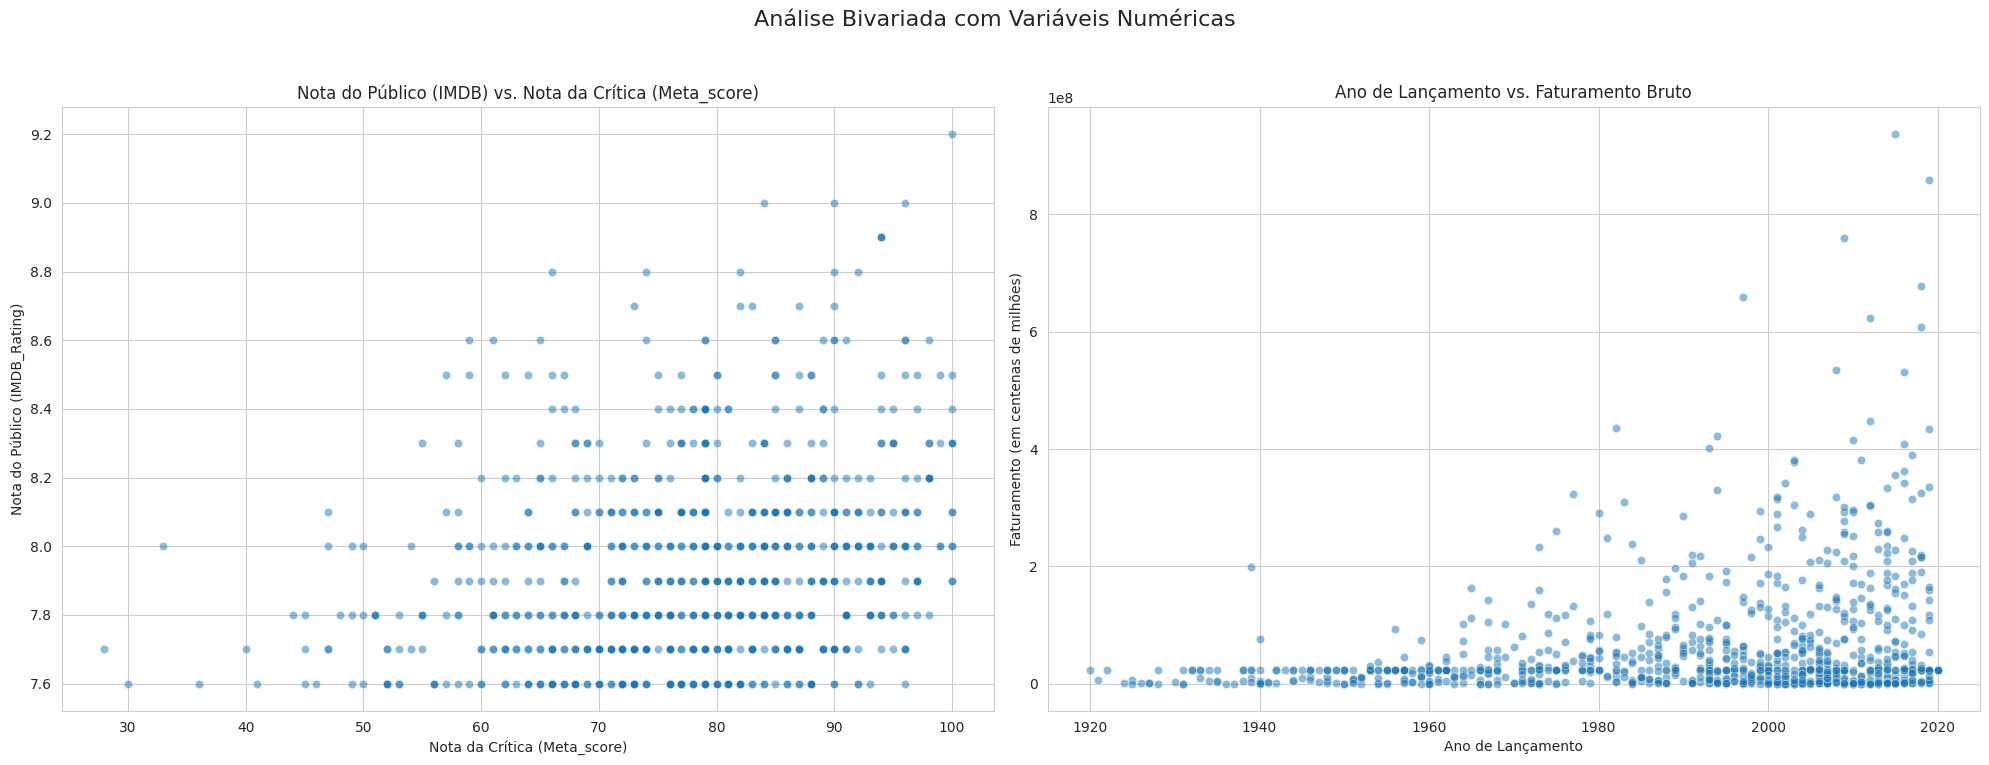

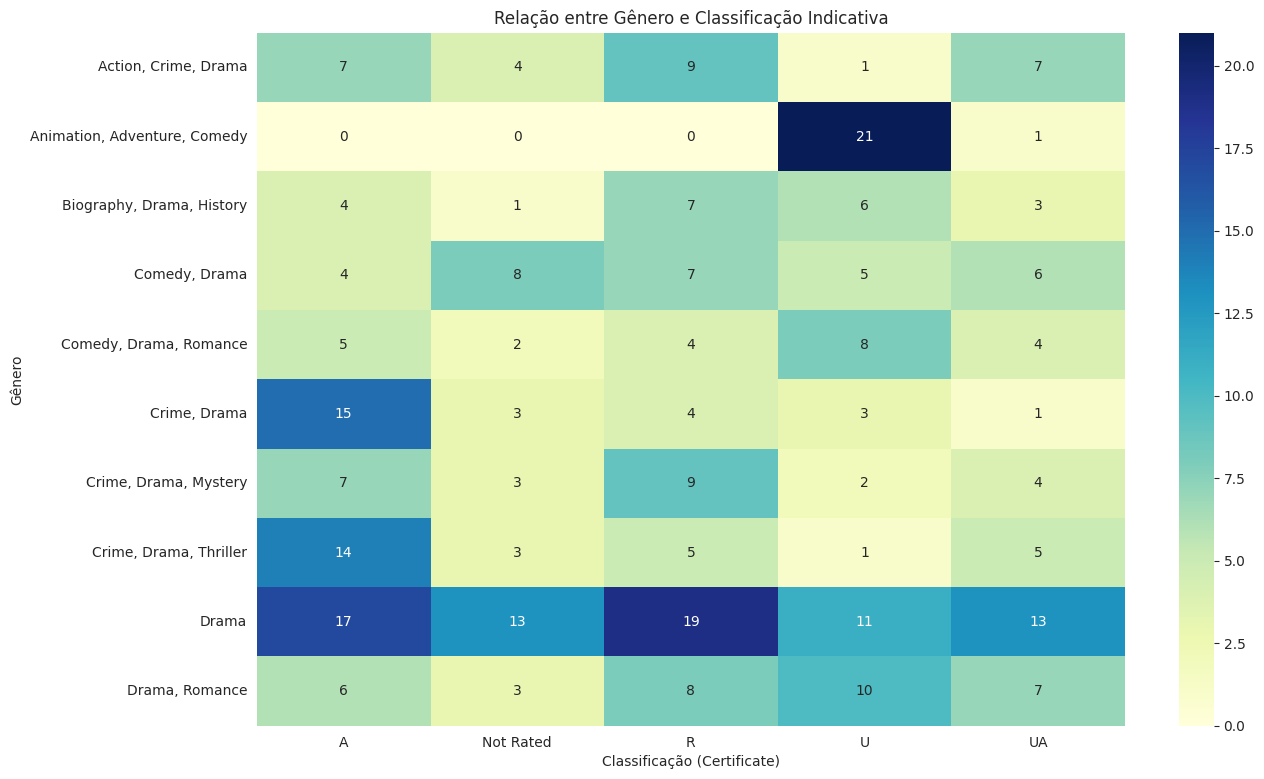

In [8]:
# Para os gráficos 1 e 2 :
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Análise Bivariada com Variáveis Numéricas', fontsize=16)

# 1. IMDB_Rating x Meta_score
sns.scatterplot(data=df, x='Meta_score', y='IMDB_Rating', ax=axes[0], alpha=0.5)
axes[0].set_title('Nota do Público (IMDB) vs. Nota da Crítica (Meta_score)')
axes[0].set_xlabel('Nota da Crítica (Meta_score)')
axes[0].set_ylabel('Nota do Público (IMDB_Rating)')
axes[0].grid(True)

# 2. Released_Year x Gross
sns.scatterplot(data=df, x='Released_Year', y='Gross', ax=axes[1], alpha=0.5)
axes[1].set_title('Ano de Lançamento vs. Faturamento Bruto')
axes[1].set_xlabel('Ano de Lançamento')
axes[1].set_ylabel('Faturamento (em centenas de milhões)')
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images/scatter_plots_bivariada.png')
plt.show()


# Para o gráfico 3, utilização de heatmap.
plt.figure(figsize=(14, 9))

top_certificates = df['Certificate'].value_counts().nlargest(5).index
top_genres = df['Genre'].value_counts().nlargest(10).index

df_filtered = df[(df['Certificate'].isin(top_certificates)) & (df['Genre'].isin(top_genres))]

contingency_table = pd.crosstab(df_filtered['Genre'], df_filtered['Certificate'])

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relação entre Gênero e Classificação Indicativa')
plt.xlabel('Classificação (Certificate)')
plt.ylabel('Gênero')
plt.savefig('images/heatmap_cert_genre.png')
plt.show()



Insights :    

- 1. `IMDB_Rating` x `Meta_score` : O gráfico de dispersão mostra uma relação positiva, porém fraca entre as duas notas. O que temos no final das contas, é um baixo coeficiente de correlação de 0.26, o que nos permite fazer uma análise, por exemplo, do fato que as opiniões da crítica especializada, muitas vezes tidos como pessoas de conhecimento superior na área de produções cinematográficas, não refletem necessariamente com o que grande público considera como bom cinema. Ou seja, para uma empresa cinematográfica, é relevante ser cauteloso com o fato de que um filme aclamado pela crítica, não necessariamente será igualmente amado pelo público, bem como o contrário também é verdade.

- 2. `Released_Year` x `Gross` : O gráfico de dispersão nesse caso nos mostra uma tendência muito clara, o potencial de faturamento de um filme tornou-se cada vez maior conforme o tempo foi passando, especialmente nas últimas décadas, com o avanço do capitalismo, da globalização, com o aumento do interesse do público motivada pelas campanhas de marketing milionárias. É um mercado já consolidado e que está constantemente se reinventando com plataformas de streaming.

- 3. `Certificate` x `Genre` : Nesse heatmap, observamos com o gênero "Drama" cruza a classificação "U" (Livre), indicando como esse gênero de fato tem um apelo amplo, sendo muito comum nas produções mais bem-sucedidas, isso porque a definição de "Drama" é bastante ampla, o que dá liberdade criativa para os diretores e atores elaborarem bons roteiros. Notamos também como "Action, Crime, Drama" tem forte concentração com a classificação "UA".

# **Questionário do Desafio**

**a) Qual filme você recomendaria para uma pessoa que você não conhece?**

Utilizando como base o EDA, a recomendação mais segura sempre será aquela que possui a maior nota nas bases de dados, em especial o IMDB, já que, como visto, o Meta_score não necessariamente reflete a opinião do grande público. Dito isso, a recomendação seria "The Godfather", por ser um Drama (gênero que agrada todas as faixas etárias), possuir uma nota elevadíssima (9.2) e ser bastante popular (1.620.367 votos).

**b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**

A matriz de correlação nos fornece as informações necessárias para respondermos essa pergunta. Nela, notamos que o número de votos (No_of_Votes), com correlação 0.6, é o fator mais forte no que diz respeito ao faturamento, indicando que a popularidade entre o grande público, aliado ao marketing (quanto mais o filme é divulgado, mais pessoas conhecem ele, o assistem e consequentemente votam nele). O tempo de duração do filme, bem como a nota do IMDB, também guardam uma correlação, porém de forma mais discreta, indicando não serem os fatores decisivos no faturamento.

**c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

É possível sim inferir o gênero do filme pela coluna Overview, uma vez que ela descreve, mesmo que de forma resumida, o coração da narrativa. Se bem escrita, é relativamente fácil descobrir e entender sobre o gênero do filme.
